# Getting data from PDFs

We need to install a few tools for this. And the truth is, Linux is a masterpiece in installing and managing dependencies.

Since I guess you don't all have a Linux box, we can use Google Colab:

https://colab.research.google.com/

Camelot (https://camelot-py.readthedocs.io) is a fanstastic tool to extract data from PDFs.

An important thing to note is that camelot is only able to process text-based PDFs (the ones that can be selected - not scanned). Scanned PDFs require a preprocessing that we will see later.

In [1]:
# dependencies needed by camelot (this works in Google Colab)
#!apt install python-tk python3-tk ghostscript

In [2]:
# install camelot
#!pip install camelot-py

In [3]:
import camelot

Let's start with a table in a sample pdf:
https://camelot-py.readthedocs.io/en/master/_static/pdf/foo.pdf

In [4]:
foo_url = 'https://cs.unibg.it/data/pdf1.pdf'
tables = camelot.read_pdf(foo_url)
tables

<TableList n=1>

In [5]:
tables[0].parsing_report

{'accuracy': 99.02, 'whitespace': 12.24, 'order': 1, 'page': 1}

In [6]:
tables[0].df

,0,1,2,3,4,5,6
0,Cycle \nName,KI \n(1/km),Distance \n(mi),Percent Fuel Savings,,,
1,,,,Improved \nSpeed,Decreased \nAccel,Eliminate \nStops,Decreased \nIdle
2,2012_2,3.30,1.3,5.9%,9.5%,29.2%,17.4%
3,2145_1,0.68,11.2,2.4%,0.1%,9.5%,2.7%
4,4234_1,0.59,58.7,8.5%,1.3%,8.5%,3.3%
5,2032_2,0.17,57.8,21.7%,0.3%,2.7%,1.2%
6,4171_1,0.07,173.9,58.1%,1.6%,2.1%,0.5%


By default, camelot uses the lattice method, which is based on lines.

Another method is based on spaces (`stream`) and can be selected like this:

In [7]:
tables = camelot.read_pdf(foo_url, flavor='stream')
tables

<TableList n=1>

In [8]:
tables[0].parsing_report

{'accuracy': 95.87, 'whitespace': 38.1, 'order': 1, 'page': 1}

In [9]:
tables[0].df

,0,1,2,3,4,5,6
0,reducing the number of stops in high KI cycles...,,,,,,
1,,Table 2-1. Simulated fuel savings from isolate...,,,,,
2,,,,,,Percent Fuel Savings,
3,Cycle,KI,Distance,,,,
4,,,,Improved,Decreased,Eliminate,Decreased
5,Name,(1/km),(mi),,,,
6,,,,Speed,Accel,Stops,Idle
7,2012_2,3.30,1.3,5.9%,9.5%,29.2%,17.4%
8,2145_1,0.68,11.2,2.4%,0.1%,9.5%,2.7%
9,4234_1,0.59,58.7,8.5%,1.3%,8.5%,3.3%


Camelot automatically manage rotated PDFs.

https://camelot-py.readthedocs.io/en/master/_static/pdf/rotated.pdf

In [10]:
rotated_url = 'https://cs.unibg.it/data/pdf2.pdf'
tables = camelot.read_pdf(rotated_url)
tables

<TableList n=1>

In [11]:
tables[0].parsing_report

{'accuracy': 96.99, 'whitespace': 5.38, 'order': 1, 'page': 1}

In [12]:
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,State,Nutritional Assessment \n(No. of individuals),,,,IYCF Practices \n(No. of mothers: \n2011-12),Blood Pressure \n(No. of adults: \n2011-12),,Fasting Blood Sugar \n(No. of adults:\n2011-12),
1,,1975-79,1988-90,1996-97,2011-12,,Men,Women,Men,Women
2,Kerala,5738,6633,8864,8297,245,2161,3195,1645,2391
3,Tamil Nadu,7387,10217,5813,7851,413,2134,2858,1119,1739
4,Karnataka,6453,8138,12606,8958,428,2467,2894,1628,2028
5,Andhra Pradesh,5844,9920,9545,8300,557,1899,2493,1111,1529
6,Maharashtra,5161,7796,6883,9525,467,2368,2648,1417,1599
7,Gujarat,4403,5374,4866,9645,477,2687,3021,2122,2503
8,Madhya Pradesh,*,*,*,7942,470,1965,2150,1579,1709
9,Orissa,3756,5540,12024,8473,398,2040,2624,1093,1628


In [13]:
other_url = 'https://cs.unibg.it/data/pdf3.pdf'
tables = camelot.read_pdf(other_url)
tables

<TableList n=2>

In [14]:
tables[0].df

,0,1,2,3
0,Offense charged,Total,Male,Female
1,,Under 18 \n18 years \nTotal\nyears\nand over,Under 18 \n18 years \nTotal\nyears\nand over,Under 18 \n18 years \nTotal\nyears\nand over
2,Total .\n .\n . . . . . .\n . .\n . ....,"11,062 .6\n1,540 .0\n9,522 .6\n467 .9\n69 .1\n...","8,263 .3\n1,071 .6\n7,191 .7\n380 .2\n56 .5\n3...","2,799 .2\n468 .3\n2,330 .9\n87 .7\n12 .6\n75 ...."


In [15]:
tables = camelot.read_pdf(other_url, flavor='stream')
tables

<TableList n=2>

In [16]:
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,"[In thousands (11,062.6 represents 11,062,600)...",,,,,,,,,
1,Program. Represents arrests reported (not char...,,,,,,,,,
2,by the FBI. Some persons may be arrested more ...,,,,,,,,,
3,could represent multiple arrests of the same p...,,,,,,,,,
4,,,Total,,,Male,,,Female,
5,Offense charged,,Under 18,18 years,,Under 18,18 years,,Under 18,18 years
6,,Total,years,and over,Total,years,and over,Total,years,and over
7,Total .\n .\n . . . . . .\n . .\n . ....,"11,062 .6","1,540 .0","9,522 .6","8,263 .3","1,071 .6","7,191 .7","2,799 .2",468 .3,"2,330 .9"
8,Violent crime . . . . . . . .\n . .\n...,467 .9,69 .1,398 .8,380 .2,56 .5,323 .7,87 .7,12 .6,75 .2
9,Murder and nonnegligent,,,,,,,,,


In [17]:
tables = camelot.read_pdf(other_url, flavor='stream', strip_text='.\n')
tables

<TableList n=2>

In [18]:
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,"[In thousands (11,0626 represents 11,062,600) ...",,,,,,,,,
1,Program Represents arrests reported (not charg...,,,,,,,,,
2,by the FBI Some persons may be arrested more t...,,,,,,,,,
3,could represent multiple arrests of the same p...,,,,,,,,,
4,,,Total,,,Male,,,Female,
5,Offense charged,,Under 18,18 years,,Under 18,18 years,,Under 18,18 years
6,,Total,years,and over,Total,years,and over,Total,years,and over
7,Total,"11,062 6","1,540 0","9,522 6","8,263 3","1,071 6","7,191 7","2,799 2",468 3,"2,330 9"
8,Violent crime,467 9,69 1,398 8,380 2,56 5,323 7,87 7,12 6,75 2
9,Murder and nonnegligent,,,,,,,,,


In [19]:
# download the file.
#!wget 'http://cs.unibg.it/data/scan.pdf'

In [20]:
#!apt install ocrmypdf

In [21]:
#!ocrmypdf

In [22]:
#!ocrmypdf scan.pdf output.pdf

In [23]:
import camelot

import pandas as pd
import seaborn as sns
pd.options.mode.chained_assignment = None

In [24]:
tables = camelot.read_pdf('output.pdf', flavor='stream')
tables

<TableList n=1>

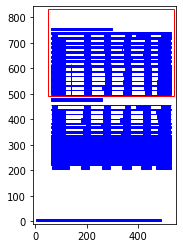

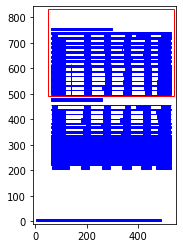

In [25]:
camelot.plot(tables[0], kind='contour')

In [26]:
# table_areas accepts strings of the form x1,y1,x2,y2 where (x1, y1) -> top-left
# and (x2, y2) -> bottom-right in PDF coordinate space. In PDF coordinate space,
# the bottom-left corner of the page is the origin, with coordinates (0, 0).

In [27]:
tables = camelot.read_pdf('output.pdf', flavor='stream',
                          table_areas=['50,800,550,490', '50,490,550,200'])
tables

<TableList n=2>

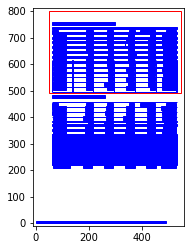

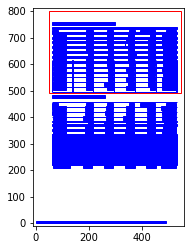

In [28]:
camelot.plot(tables[0], kind='contour')

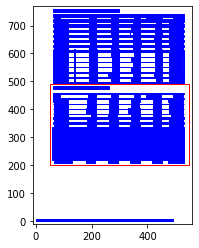

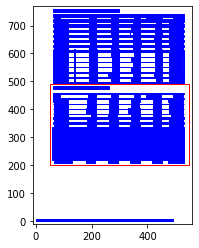

In [29]:
camelot.plot(tables[1], kind='contour')

In [30]:
tables[0].parsing_report

{'accuracy': 88.05, 'whitespace': 18.37, 'order': 1, 'page': 1}

In [31]:
tables[1].parsing_report

{'accuracy': 88.43, 'whitespace': 5.56, 'order': 2, 'page': 1}

In [32]:
df = tables[0].df
df

,0,1,2,3,4,5,6
0,,Table name: daily historical stock prices & vo...,,,,,
1,Date,Open,High,,Low),Close Last,Volume
2,01/04/2017,62.48,62.75,,62.12,62.3),"21,325,140"
3,01/03/2017,62.79,62.84,,62.125,62.58},"20,655,190"
4,12/30/2016,62.96,62.99,~,62.03,6244|,"—--25)575,720"
5,12/29/2016,62.86,63.2,,62.73,62.9,"10,248,460"
6,12/28/2016,63.4,63.4,,62.83),"62.99,","14,348,340"
7,12/27/2016,63.21,64.07,,63.21,63.28),"11,743,650"
8,12/23/2016,63.45,63.54,,62.8,"63.24,","12,399,540"
9,12/22/2016,63.84,64.1,,63.405,63.55),"22,175,270"


In [33]:
df = df.drop(0, axis=0).reset_index(drop=True)
df

,0,1,2,3,4,5,6
0,Date,Open,High,,Low),Close Last,Volume
1,01/04/2017,62.48,62.75,,62.12,62.3),"21,325,140"
2,01/03/2017,62.79,62.84,,62.125,62.58},"20,655,190"
3,12/30/2016,62.96,62.99,~,62.03,6244|,"—--25)575,720"
4,12/29/2016,62.86,63.2,,62.73,62.9,"10,248,460"
5,12/28/2016,63.4,63.4,,62.83),"62.99,","14,348,340"
6,12/27/2016,63.21,64.07,,63.21,63.28),"11,743,650"
7,12/23/2016,63.45,63.54,,62.8,"63.24,","12,399,540"
8,12/22/2016,63.84,64.1,,63.405,63.55),"22,175,270"
9,12/21/2016,63.43,63.7,,63.12,63.541,"17,084,370"


In [34]:
df = df.replace(r'[^!-~]+', ' ', regex=True)
df

,0,1,2,3,4,5,6
0,Date,Open,High,,Low),Close Last,Volume
1,01/04/2017,62.48,62.75,,62.12,62.3),"21,325,140"
2,01/03/2017,62.79,62.84,,62.125,62.58},"20,655,190"
3,12/30/2016,62.96,62.99,~,62.03,6244|,"--25)575,720"
4,12/29/2016,62.86,63.2,,62.73,62.9,"10,248,460"
5,12/28/2016,63.4,63.4,,62.83),"62.99,","14,348,340"
6,12/27/2016,63.21,64.07,,63.21,63.28),"11,743,650"
7,12/23/2016,63.45,63.54,,62.8,"63.24,","12,399,540"
8,12/22/2016,63.84,64.1,,63.405,63.55),"22,175,270"
9,12/21/2016,63.43,63.7,,63.12,63.541,"17,084,370"


In [35]:
df = df.replace(to_replace=r'[(){}\[\]~|-]', value='', regex=True)
df

,0,1,2,3,4,5,6
0,Date,Open,High,,Low,Close Last,Volume
1,01/04/2017,62.48,62.75,,62.12,62.3,"21,325,140"
2,01/03/2017,62.79,62.84,,62.125,62.58,"20,655,190"
3,12/30/2016,62.96,62.99,,62.03,6244,"25575,720"
4,12/29/2016,62.86,63.2,,62.73,62.9,"10,248,460"
5,12/28/2016,63.4,63.4,,62.83,"62.99,","14,348,340"
6,12/27/2016,63.21,64.07,,63.21,63.28,"11,743,650"
7,12/23/2016,63.45,63.54,,62.8,"63.24,","12,399,540"
8,12/22/2016,63.84,64.1,,63.405,63.55,"22,175,270"
9,12/21/2016,63.43,63.7,,63.12,63.541,"17,084,370"


In [36]:
df = df.apply(lambda x: x.str.strip())
df

,0,1,2,3,4,5,6
0,Date,Open,High,,Low,Close Last,Volume
1,01/04/2017,62.48,62.75,,62.12,62.3,"21,325,140"
2,01/03/2017,62.79,62.84,,62.125,62.58,"20,655,190"
3,12/30/2016,62.96,62.99,,62.03,6244,"25575,720"
4,12/29/2016,62.86,63.2,,62.73,62.9,"10,248,460"
5,12/28/2016,63.4,63.4,,62.83,"62.99,","14,348,340"
6,12/27/2016,63.21,64.07,,63.21,63.28,"11,743,650"
7,12/23/2016,63.45,63.54,,62.8,"63.24,","12,399,540"
8,12/22/2016,63.84,64.1,,63.405,63.55,"22,175,270"
9,12/21/2016,63.43,63.7,,63.12,63.541,"17,084,370"


In [37]:
df = df.replace(r',$', '', regex=True)
df

,0,1,2,3,4,5,6
0,Date,Open,High,,Low,Close Last,Volume
1,01/04/2017,62.48,62.75,,62.12,62.3,"21,325,140"
2,01/03/2017,62.79,62.84,,62.125,62.58,"20,655,190"
3,12/30/2016,62.96,62.99,,62.03,6244,"25575,720"
4,12/29/2016,62.86,63.2,,62.73,62.9,"10,248,460"
5,12/28/2016,63.4,63.4,,62.83,62.99,"14,348,340"
6,12/27/2016,63.21,64.07,,63.21,63.28,"11,743,650"
7,12/23/2016,63.45,63.54,,62.8,63.24,"12,399,540"
8,12/22/2016,63.84,64.1,,63.405,63.55,"22,175,270"
9,12/21/2016,63.43,63.7,,63.12,63.541,"17,084,370"


In [38]:
df = df.replace(r',', '', regex=True)
df

,0,1,2,3,4,5,6
0,Date,Open,High,,Low,Close Last,Volume
1,01/04/2017,62.48,62.75,,62.12,62.3,21325140
2,01/03/2017,62.79,62.84,,62.125,62.58,20655190
3,12/30/2016,62.96,62.99,,62.03,6244,25575720
4,12/29/2016,62.86,63.2,,62.73,62.9,10248460
5,12/28/2016,63.4,63.4,,62.83,62.99,14348340
6,12/27/2016,63.21,64.07,,63.21,63.28,11743650
7,12/23/2016,63.45,63.54,,62.8,63.24,12399540
8,12/22/2016,63.84,64.1,,63.405,63.55,22175270
9,12/21/2016,63.43,63.7,,63.12,63.541,17084370


In [39]:
df = df.drop(3, axis=1)
df

,0,1,2,4,5,6
0,Date,Open,High,Low,Close Last,Volume
1,01/04/2017,62.48,62.75,62.12,62.3,21325140
2,01/03/2017,62.79,62.84,62.125,62.58,20655190
3,12/30/2016,62.96,62.99,62.03,6244,25575720
4,12/29/2016,62.86,63.2,62.73,62.9,10248460
5,12/28/2016,63.4,63.4,62.83,62.99,14348340
6,12/27/2016,63.21,64.07,63.21,63.28,11743650
7,12/23/2016,63.45,63.54,62.8,63.24,12399540
8,12/22/2016,63.84,64.1,63.405,63.55,22175270
9,12/21/2016,63.43,63.7,63.12,63.541,17084370


In [40]:
columns = df.loc[0]
df = df.loc[1:]
df.columns = columns
df

,Date,Open,High,Low,Close Last,Volume
1,01/04/2017,62.48,62.75,62.12,62.3,21325140
2,01/03/2017,62.79,62.84,62.125,62.58,20655190
3,12/30/2016,62.96,62.99,62.03,6244,25575720
4,12/29/2016,62.86,63.2,62.73,62.9,10248460
5,12/28/2016,63.4,63.4,62.83,62.99,14348340
6,12/27/2016,63.21,64.07,63.21,63.28,11743650
7,12/23/2016,63.45,63.54,62.8,63.24,12399540
8,12/22/2016,63.84,64.1,63.405,63.55,22175270
9,12/21/2016,63.43,63.7,63.12,63.541,17084370
10,12/20/2016,63.69,63.8,63.025,63.54,26017470


In [41]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close Last', 'Volume'], dtype='object', name=0)

In [42]:
df[['Date']] = df[['Date']].apply(pd.to_datetime)
df

,Date,Open,High,Low,Close Last,Volume
1,2017-01-04,62.48,62.75,62.12,62.3,21325140
2,2017-01-03,62.79,62.84,62.125,62.58,20655190
3,2016-12-30,62.96,62.99,62.03,6244,25575720
4,2016-12-29,62.86,63.2,62.73,62.9,10248460
5,2016-12-28,63.4,63.4,62.83,62.99,14348340
6,2016-12-27,63.21,64.07,63.21,63.28,11743650
7,2016-12-23,63.45,63.54,62.8,63.24,12399540
8,2016-12-22,63.84,64.1,63.405,63.55,22175270
9,2016-12-21,63.43,63.7,63.12,63.541,17084370
10,2016-12-20,63.69,63.8,63.025,63.54,26017470


In [43]:
df[['Open', 'High', 'Low', 'Close Last', 'Volume']] = \
    df[['Open', 'High', 'Low', 'Close Last', 'Volume']].apply(pd.to_numeric)

In [44]:
df

,Date,Open,High,Low,Close Last,Volume
1,2017-01-04,62.48,62.75,62.120,62.300,21325140
2,2017-01-03,62.79,62.84,62.125,62.580,20655190
3,2016-12-30,62.96,62.99,62.030,6244.000,25575720
4,2016-12-29,62.86,63.20,62.730,62.900,10248460
5,2016-12-28,63.40,63.40,62.830,62.990,14348340
6,2016-12-27,63.21,64.07,63.210,63.280,11743650
7,2016-12-23,63.45,63.54,62.800,63.240,12399540
8,2016-12-22,63.84,64.10,63.405,63.550,22175270
9,2016-12-21,63.43,63.70,63.120,63.541,17084370
10,2016-12-20,63.69,63.80,63.025,63.540,26017470


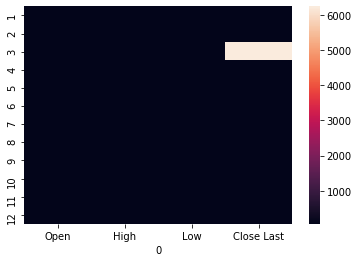

In [45]:
sns.heatmap(df[['Open', 'High', 'Low', 'Close Last']])

In [46]:
def fix(n):
    if n > 100:
        return n / 100
    else:
        return n

In [47]:
df[['Open', 'High', 'Low', 'Close Last']] = \
    df[['Open', 'High', 'Low', 'Close Last']].applymap(fix)

In [48]:
df

,Date,Open,High,Low,Close Last,Volume
1,2017-01-04,62.48,62.75,62.120,62.300,21325140
2,2017-01-03,62.79,62.84,62.125,62.580,20655190
3,2016-12-30,62.96,62.99,62.030,62.440,25575720
4,2016-12-29,62.86,63.20,62.730,62.900,10248460
5,2016-12-28,63.40,63.40,62.830,62.990,14348340
6,2016-12-27,63.21,64.07,63.210,63.280,11743650
7,2016-12-23,63.45,63.54,62.800,63.240,12399540
8,2016-12-22,63.84,64.10,63.405,63.550,22175270
9,2016-12-21,63.43,63.70,63.120,63.541,17084370
10,2016-12-20,63.69,63.80,63.025,63.540,26017470


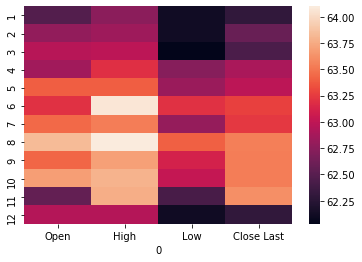

In [49]:
sns.heatmap(df[['Open', 'High', 'Low', 'Close Last']])

In [50]:
df2 = tables[1].df
df2

,0,1,2,3,4,5
0,,http://www.nasdaq.com/symbol/fb/historical,,,,
1,Date,Open,High,"Low,",Close Last,Volume
2,01/04/2017,117.55,119.66,117.29,118.69|,"19,594,560"
3,01/03/2017,116.03,117.84,115.51,116.86,"20,635,600"
4,12/30/2016,116.595,116.83,114.7739,115.05),"18,668,290"
5,12/29/2016,117,117.531,116.06,116.35,"9,925,082"
6,12/28/2016,118.19,118.25,116.65,116.92|,"11,985,740"
7,12/27/2016,116.96,118.68,116.864,118.01/,"12,034,590"
8,12/23/2016,117,117.56,116.3,117.27;,"10,885,030"
9,12/22/2016,118.86,118.99,116.93,417.4|,"16,296,770"


In [51]:
#from google.colab import drive
#drive.mount('/content/drive')

In [52]:
#df2.to_excel('/content/drive/My Drive/AEM/df2.xlsx')

In [53]:
#df2 = pd.read_excel('/content/drive/My Drive/AEM/df2.xlsx')

In [54]:
#sns.heatmap(df2[['Open', 'High', 'Low', 'Close / Last']])